## k-NearestNeighbor(k-최근접이웃) 알고리즘

 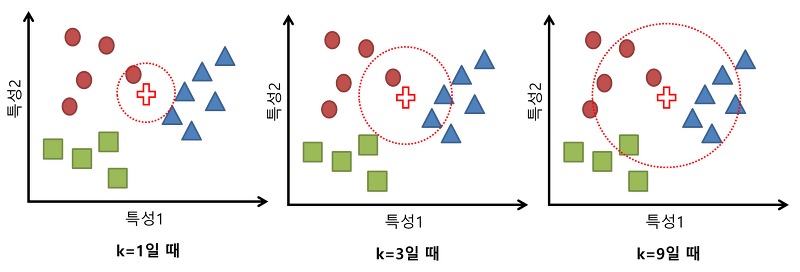

#붓꽃데이터 분류
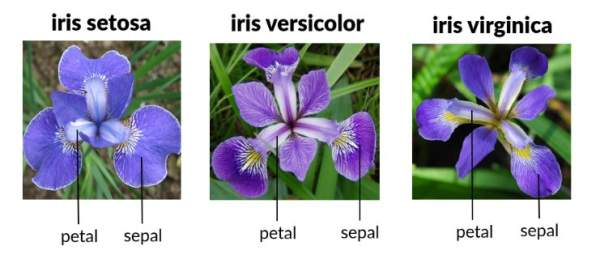

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 준비

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI_Hub/AI_Hub/2022_Mobile_AI_AIHUB/iris.csv')

In [ ]:
iris.head()

,caseno,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   caseno       150 non-null    int64  
 1   SepalLength  150 non-null    float64
 2   SepalWidth   150 non-null    float64
 3   PetalLength  150 non-null    float64
 4   PetalWidth   150 non-null    float64
 5   Species      150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris['Species'].value_counts()


setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [ ]:
iris.describe()

,caseno,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
np.unique(iris['Species'])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
np.unique(iris['Species'], return_counts=True)

(array(['setosa', 'versicolor', 'virginica'], dtype=object),
 array([50, 50, 50]))

In [ ]:
iris.values

In [ ]:
#혼자
setosa = iris[:50]
versicolor = iris[50: 100]
virginica = iris[100:]

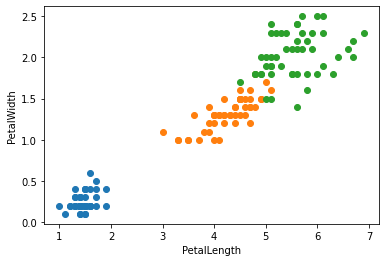

In [ ]:
#혼자
import matplotlib.pyplot as plt

l = 'PetalLength'
w = 'PetalWidth'
plt.scatter(setosa[l], setosa[w])
plt.scatter(versicolor[l], versicolor[w])
plt.scatter(virginica[l], virginica[w])
plt.xlabel(l)
plt.ylabel(w)
plt.show()

In [ ]:
iris = iris[['PetalLength', 'PetalWidth', 'Species']]

In [ ]:
iris.head()

,PetalLength,PetalWidth,Species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [ ]:
setosa = iris[iris.Species == 'setosa']
versicolor = iris[iris.Species == 'versicolor']
virginica = iris[iris.Species == 'virginica']
print(setosa.shape)
print(versicolor.shape)
print(virginica.shape)

(50, 3)
(50, 3)
(50, 3)


## Data와 Target분리

In [ ]:
iris_input = iris[['PetalLength', 'PetalWidth']]
iris_input.shape

(150, 2)

In [ ]:
iris_target = iris['Species']

## Dataframe을 Numpy ndarray로 변환

In [ ]:
iris_input = iris_input.to_numpy()
iris_target = iris_target.to_numpy()

In [ ]:
setosa = setosa.to_numpy()
versicolor = versicolor.to_numpy()
virginica = virginica.to_numpy()


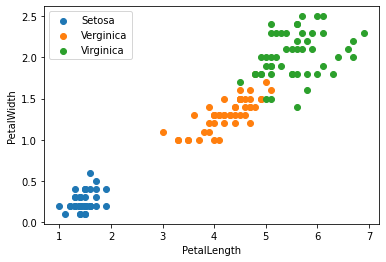

In [ ]:
plt.scatter(setosa[:,0], setosa[:, 1])
plt.scatter(versicolor[:, 0], versicolor[:, 1])
plt.scatter(virginica[:, 0], virginica[:, 1])
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend(['Setosa', 'Versicolor', 'Virginica'])

plt.show()

## Train, Test용 데이터분리 

In [ ]:
from sklearn.model_selection import train_test_split

iris_train_input, iris_test_input, iris_train_target, iris_test_target = train_test_split(iris_input, iris_target, test_size = 0.2, random_state = 11)
#시드값이 42면 100퍼센트

In [ ]:
print(iris_train_input.shape)
print(iris_train_target.shape)
print(iris_test_input.shape)
print(iris_test_target.shape)

(120, 2)
(120,)
(30, 2)
(30,)


## 표준화

속성간에 스케일이 다르거나 범위가 다르면 잘못된 분석을 할 수 있다.

각 속성마다 평균을 구하고, 해당 값과 평균 사이의 오차를구한다.
표준 편차를 고려한다.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
ss.fit(iris_train_input)
train_scaled = ss.transform(iris_train_input)
test_scaled = ss.transform(iris_test_input)

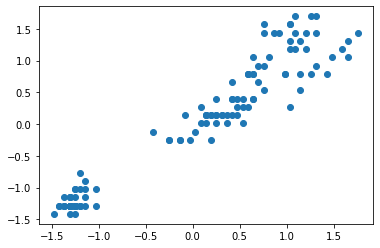

In [ ]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])

# k-최근접 이웃 다중분류

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn = kn.fit(train_scaled, iris_train_target)
kn.score(test_scaled, iris_test_target)

#나는 정확도가 100%이다. 아마 시드값이 달라서 그런듯

0.9333333333333333

In [ ]:

kn.predict(test_scaled[[0]])

array(['virginica'], dtype=object)

In [ ]:
kn1 = KNeighborsClassifier(n_neighbors=1)
kn1.fit(train_scaled, iris_train_target)
kn1.score(test_scaled, iris_test_target)

0.9

In [ ]:
for i in [1,3, 5, 7, 9]:
  print(i)
  knN = KNeighborsClassifier(n_neighbors=i)
  knN.fit(train_scaled, iris_train_target)
  print(knN.score(test_scaled, iris_test_target))

1
0.9
3
0.9333333333333333
5
0.9333333333333333
7
0.9333333333333333
9
0.9333333333333333


In [ ]:
kn.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
print(iris_test_target[0: 10])

['virginica' 'virginica' 'virginica' 'versicolor' 'virginica' 'setosa'
 'versicolor' 'setosa' 'setosa' 'versicolor']


In [ ]:
kn.predict(test_scaled[0: 10])

array(['virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [ ]:
kn.predict_proba(test_scaled[0: 10])

array([[0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ]])

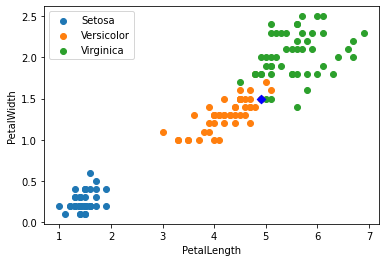

In [ ]:
realData = [4.9, 1.5]
plt.scatter(setosa[:,0], setosa[:, 1])
plt.scatter(versicolor[:, 0], versicolor[:, 1])
plt.scatter(virginica[:, 0], virginica[:, 1])
plt.scatter(realData[0], realData[1], marker='D', c = 'B')
plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')
plt.legend(['Setosa', 'Versicolor', 'Virginica'])

plt.show()

In [ ]:
#실측값을 스케일링하기
realData = np.array([[4.9, 1.5], [4.7, 1.7]])
real_scaled = ss.transform(realData)
kn.predict_proba(real_scaled)

array([[0. , 1. , 0. ],
       [0. , 0.4, 0.6]])